In [1]:
# Libraries laden

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from heapq import nlargest
pd.options.display.max_rows = 4000

In [3]:
# Tabellen laden
df2016 = pd.read_csv('2016_PKS_1.csv', sep=';', header=None, engine='python')
df2017 = pd.read_csv('2017_PKS.csv', sep=';', header=None, engine='python')

In [4]:
# Variablen
fallzahl2007 = 6284661
fallzahl2008 = 6114128
fallzahl2009 = 6054330
fallzahl2010 = 5933278
fallzahl2011 = 5990679
fallzahl2012 = 5997040
fallzahl2013 = 5961662
fallzahl2014 = 6082064
fallzahl2015 = 6330649
fallzahl2016 = 6372526
fallzahl2017 = 5761984

fallzahl = np.array([fallzahl2007, fallzahl2008, fallzahl2009, fallzahl2010, fallzahl2011, fallzahl2012, fallzahl2013, fallzahl2014,
fallzahl2015, fallzahl2016, fallzahl2017])

auslaenderVerst2007 = 88621 
auslaenderVerst2008 = 76704
auslaenderVerst2009 = 74241
auslaenderVerst2010 = 74153
auslaenderVerst2011 = 78324
auslaenderVerst2012 = 89029
auslaenderVerst2013 = 110555
auslaenderVerst2014 = 156396
auslaenderVerst2015 = 402741
auslaenderVerst2016 = 487711
auslaenderVerst2017 = 179848

auslaenderVerst = np.array([auslaenderVerst2007, auslaenderVerst2008, auslaenderVerst2009, auslaenderVerst2010, auslaenderVerst2011,
auslaenderVerst2012, auslaenderVerst2013, auslaenderVerst2014, auslaenderVerst2015, auslaenderVerst2016, auslaenderVerst2017])

fallzahlOhneAusl = (fallzahl - auslaenderVerst)/1000000

## Straftatbestände
mord2016 = 1468 # Mord und sonstiger Mord
mord2017 = 1520
totschlag2016 = 1657
totschlag2017 = 1594 # Totschlag und Tötung auf Verlangen
sex2016 = 7919
sex2017 = 11282
raub2016 = 43009 # Schlüssel 210000
raub2017 = 38849 
rauschgift2017 = 330580
cannabis2017 = 166236
cannabisHandel2017 = 25365
cannabisSchmuggel217 = 6560

## Tatverdächtigenzahlen inklusive ausländerrechtliche Verstöße
tatverdaechtige2017 = 2112715
tatverdaechtigeAuslaender2017 = 736265
tatverdaechtigeDeutsche2017 = tatverdaechtige2017 - tatverdaechtigeAuslaender2017

## Tatverdächtigenzahlen exklusive ausländerrechtliche Verstöße
tatverdaechtigeAuslaender2017_ohne = 599357
tatverdaechtigeDeutsche2017_ohne = 1375448
tatverdaechtige2017_ohne = tatverdaechtigeAuslaender2017_ohne + tatverdaechtigeDeutsche2017_ohne
tatverdaechtigeAuslaender2016_ohne = 616230

## Prozentuale Veränderungen ausgewählter Straftatbestände 2016 - 2017
mordDiff = (mord2017 - mord2016)/mord2017 *100
totschlagDiff = (totschlag2017 - totschlag2016)/totschlag2017 * 100
sexDiff = (sex2017 - sex2016)/sex2017 * 100
raubDiff = (raub2017 - raub2016)/raub2017 * 100

## Bevölkerungszahlen - Quelle: Statistisches Bundesamt, stand 2017
bevoelkerungTotal = 82665600
bevoelkerungAuslaender = 10623940
bevoelkerungEuropaeer = 7507310
bevoelkerungAfrikaner = 539385
bevoelkerungTuerkei = 1483515
bevoelkerungAsien = 2184410
bevoelkerungSyrien = 698950
bevoelkerungAfghanistan = 251640
bevoelkerungIrak = 237365
bevoelkerungChina = 136460

## Bevölkerung nach männlich, weiblich und Nationalität - Quelle: Statistisches Bundesamt, stand 2017
bevoelkerungTotalM = 40788500
bevoelkerungTotalW = 41877000
bevoelkerungAuslaenderM = 5742180
bevoelkerungAuslaenderW = 4881760
bevoelkerungEuropaeerM = 3972430
bevoelkerungEuropaeerW = 3534880
bevoelkerungTuerkeiM = 764935
bevoelkerungTuerkeiW = 718580
bevoelkerungAfrikanerM = 335375
bevoelkerungAfrikanerW = 204010
bevoelkerungAsienM = 1233565
bevoelkerungAsienW = 950845
bevoelkerungSyrienM = 428960
bevoelkerungSyrienW = 269990
bevoelkerungAfghanistanM = 166015
bevoelkerungAfghanistanW = 85625
bevoelkerungIrakM = 140655
bevoelkerungIrakW = 96710
bevoelkerungChinaM = 64330
bevoelkerungChinaW = 72130

## Ausländische Bevölkerung nach Alter - Quelle: Statistisches Bundesamt, stand 2017
durchschnittsAlterAuslaender = 37.7
durchschnittsAlterDeutsche = 44.3 # stand 2016
durchschnittsAlterAfrikaner = 30.8
durchschnittsAlterEuropaeer = 40.6
durchschnittsAlterTuerkei = 44.8
durchschnittsAlterAsien = 29.3
durchschnittsAlterSyrien = 24.2
durchschnittsAlterAfghanistan = 24.2
durchschnittsAlterIrak = 25.5
durchschnittsAlterChina = 31.4

# Berechnungen mit Bevölkerungszahlen nach Geschlecht und Alter

## Männer- und Frauenanteil Gesamtbevölkerung
bevoelkerungTotalAnteilM = round(bevoelkerungTotalM / bevoelkerungTotal * 100, 2)
bevoelkerungTotalAnteilW = round(bevoelkerungTotalW / bevoelkerungTotal * 100, 2)

## Männer- und Frauenanteil Ausländer insgesamt
bevoelkerungAuslaenderAnteilM = round(bevoelkerungAuslaenderM / bevoelkerungAuslaender * 100, 2)
bevoelkerungAuslaenderAnteilW = round(bevoelkerungAuslaenderW / bevoelkerungAuslaender * 100, 2)

## Männer- und Frauenanteil EU-Ausländer
bevoelkerungEuropaeerAnteilM = round(bevoelkerungEuropaeerM / bevoelkerungEuropaeer * 100, 2)
bevoelkerungEuropaeerAnteilW = round(bevoelkerungEuropaeerW / bevoelkerungEuropaeer * 100, 2)

## Männer- und Frauenanteil Afrikaner
bevoelkerungAfrikanerAnteilM = round(bevoelkerungAfrikanerM / bevoelkerungAfrikaner * 100, 2)
bevoelkerungAfrikanerAnteilW = round(bevoelkerungAfrikanerW / bevoelkerungAfrikaner * 100, 2)

## Männer- und Frauenanteil Asiaten insgesamt
bevoelkerungAsienAnteilM = round(bevoelkerungAsienM / bevoelkerungAsien * 100, 2)
bevoelkerungAsienAnteilW = round(bevoelkerungAsienW / bevoelkerungAsien * 100, 2)

## Männer- und Frauenanteil Syrer
bevoelkerungSyrienAnteilM = round(bevoelkerungSyrienM / bevoelkerungSyrien * 100, 2)
bevoelkerungSyrienAnteilW = round(bevoelkerungSyrienW / bevoelkerungSyrien * 100, 2)

## Männer- und Frauenanteil Afghanen
bevoelkerungAfghanistanAnteilM = round(bevoelkerungAfghanistanM / bevoelkerungAfghanistan * 100, 2)
bevoelkerungAfghanistanAnteilW = round(bevoelkerungAfghanistanW / bevoelkerungAfghanistan * 100, 2)

## Männer- und Frauenanteil Iraker
bevoelkerungIrakAnteilM = round(bevoelkerungIrakM / bevoelkerungIrak * 100, 2)
bevoelkerungIrakAnteilW = round(bevoelkerungIrakW / bevoelkerungIrak * 100, 2)

## Männer- und Frauenanteil Türken
bevoelkerungTuerkeiAnteilM = round(bevoelkerungTuerkeiM / bevoelkerungTuerkei * 100, 2)
bevoelkerungTuerkeiAnteilW = round(bevoelkerungTuerkeiW / bevoelkerungTuerkei * 100, 2)

## Männer- und Frauenanteil China
bevoelkerungChinaAnteilM = round(bevoelkerungChinaM / bevoelkerungChina * 100, 2)
bevoelkerungChinaAnteilW = round(bevoelkerungChinaW / bevoelkerungChina * 100, 2)

In [5]:
# Anteil Männer und Frauen nach Nationalität und Durchschnittsalter
data = np.array([['','Insgesamt','Anteil maennlich', 'Anteil weiblich', 'Durchschnittsalter'],
['Deutschland', bevoelkerungTotal, bevoelkerungTotalAnteilM, bevoelkerungTotalAnteilW, durchschnittsAlterDeutsche],
['Ausland', bevoelkerungAuslaender, bevoelkerungAuslaenderAnteilM, bevoelkerungAuslaenderAnteilW, durchschnittsAlterAuslaender],
['Europa', bevoelkerungEuropaeer, bevoelkerungEuropaeerAnteilM, bevoelkerungEuropaeerAnteilW, durchschnittsAlterEuropaeer],
['Tuerkei', bevoelkerungTuerkei, bevoelkerungTuerkeiAnteilM, bevoelkerungTuerkeiAnteilW, durchschnittsAlterTuerkei],
['Afrika', bevoelkerungAfrikaner, bevoelkerungAfrikanerAnteilM, bevoelkerungAfrikanerAnteilW, durchschnittsAlterAfrikaner],
['Asien', bevoelkerungAsien, bevoelkerungAsienAnteilM, bevoelkerungAsienAnteilW, durchschnittsAlterAsien],
['Syrien', bevoelkerungSyrien, bevoelkerungSyrienAnteilM, bevoelkerungSyrienAnteilW, durchschnittsAlterSyrien],
['Afghanistan', bevoelkerungAfghanistan, bevoelkerungAfghanistanAnteilM, bevoelkerungAfghanistanAnteilW, durchschnittsAlterAfghanistan],
['Irak', bevoelkerungIrak, bevoelkerungIrakAnteilM, bevoelkerungIrakAnteilW, durchschnittsAlterIrak],
['China', bevoelkerungChina, bevoelkerungChinaAnteilM, bevoelkerungChinaAnteilW, durchschnittsAlterChina]])
                
bevoelkerung = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

bevoelkerung

,Insgesamt,Anteil maennlich,Anteil weiblich,Durchschnittsalter
Deutschland,82665600,49.34,50.66,44.3
Ausland,10623940,54.05,45.95,37.7
Europa,7507310,52.91,47.09,40.6
Tuerkei,1483515,51.56,48.44,44.8
Afrika,539385,62.18,37.82,30.8
Asien,2184410,56.47,43.53,29.3
Syrien,698950,61.37,38.63,24.2
Afghanistan,251640,65.97,34.03,24.2
Irak,237365,59.26,40.74,25.5
China,136460,47.14,52.86,31.4


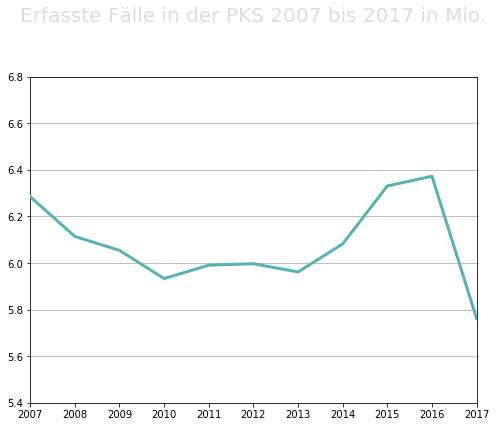

In [6]:
# Vergleich der Entwicklung der Fallzahlen in der PKS zwischen 2012 und 2017

## Fallzahlen und Jahr als Array
y = np.array([fallzahl2007/1000000, fallzahl2008/1000000, fallzahl2009/1000000, fallzahl2010/1000000, fallzahl2011/1000000, fallzahl2012/1000000, fallzahl2013/1000000, fallzahl2014/1000000, fallzahl2015/1000000, fallzahl2016/1000000, fallzahl2017/1000000])
x = np.array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

## Linechart aus den beiden Arrays
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, zorder=3, linewidth=3, color='#56b3b5')
plt.axis([0, 5, 5.4, 6.8])
ttl1 = plt.title('Erfasste Fälle in der PKS 2007 bis 2017 in Mio.', color='#dddddd', size=20, weight=400)
ttl1.set_position([.5, 1.15])
plt.xticks(x)
plt.grid(axis='y')
plt.show()

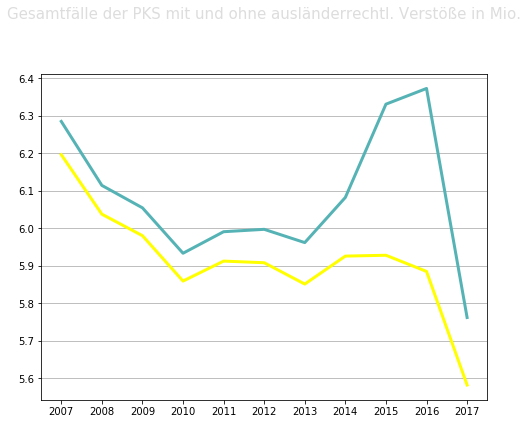

In [7]:
# Fallzahlen insgesamt, verglichen mit Fallzahlen insgesamt ohne ausländerrechtliche Verstöße 2007 - 2017

y1 = fallzahlOhneAusl
x1 = np.array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

fig = plt.figure(figsize=(8,6))
ttl2 = plt.title('Gesamtfälle der PKS mit und ohne ausländerrechtl. Verstöße in Mio.', color='#dddddd', size=15, weight=400)
ttl2.set_position([.5, 1.15])
plt.plot(x,y,zorder=3, linewidth=3, color='#56b3b5')
plt.plot(x1,y1, zorder=3, linewidth=3, color='yellow')
plt.grid(axis='y')
plt.show()

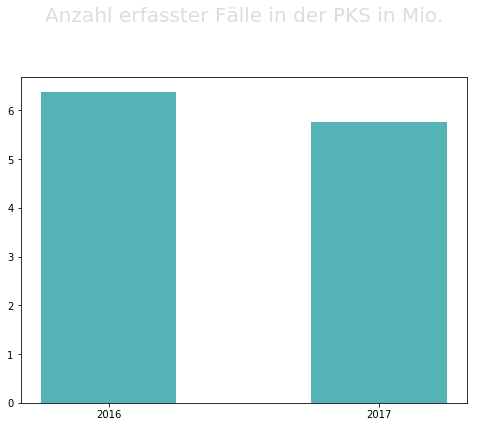

In [8]:
# Balkendiagramm Fallzahlen 2016 vs 2017 insgesamt

x_axis1 = ['2016', '2017']
y_axis1 = [fallzahl2016/1000000, fallzahl2017/1000000]

ind = np.arange(len(x_axis1))
fig = plt.figure(figsize=(8,6))
ttl3 = plt.title('Anzahl erfasster Fälle in der PKS in Mio.', color='#dddddd', size=20, weight=400)
plt.xticks(ind, x_axis1)
ttl3.set_position([.5, 1.15])
plt.bar(ind, y_axis1, width=0.5, color='#56b3b5', zorder=3)
plt.show()

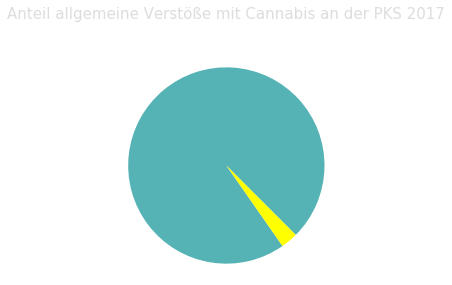

In [9]:
# Pie Chart um Anteil an Cannabisverstößen (allgemein) an Gesamtzahl zu zeigen

plt.pie([fallzahl2017, cannabis2017], startangle=-45, colors=('#56b3b5', 'yellow')) 
ttl4 = plt.title('Anteil allgemeine Verstöße mit Cannabis an der PKS 2017', color='#dddddd', size=15, weight=400)
ttl4.set_position([0.5,1.15])
plt.axis('equal')
plt.show()
#plt.savefig('Anteil Cannabisdelikte 2017.svg', facecolor='#111111')

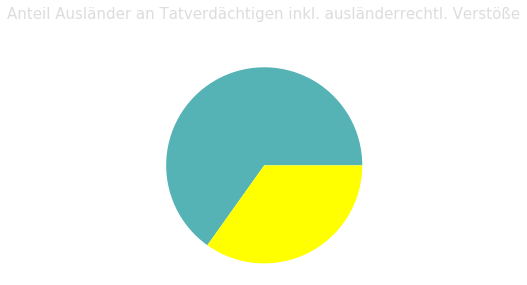

In [10]:
# Anteil Nichtdeutscher an allen Tatverdächtigen (inklusive ausländerrechtliche Verstöße)

plt.pie([tatverdaechtigeDeutsche2017, tatverdaechtigeAuslaender2017], startangle=0, colors=('#56b3b5', 'yellow'))
ttl5 = plt.title('Anteil Ausländer an Tatverdächtigen inkl. ausländerrechtl. Verstöße', color='#dddddd', size=15, weight=400)
ttl5.set_position([0.5,1.15])
plt.axis('equal')
plt.show()

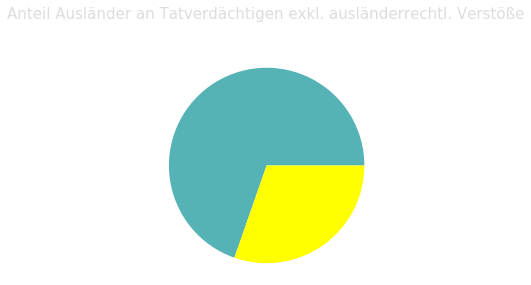

In [11]:
# Anteil Nichtdeutscher an allen Tatverdächtigen (exklusive ausländerrechtliche Verstöße)

plt.pie([tatverdaechtigeDeutsche2017_ohne, tatverdaechtigeAuslaender2017_ohne],startangle=0, colors=('#56b3b5', 'yellow'))
plt.axis('equal')
ttl6 = plt.title('Anteil Ausländer an Tatverdächtigen exkl. ausländerrechtl. Verstöße', color='#dddddd', size=15, weight=400)
ttl6.set_position([0.5,1.15])
plt.show()

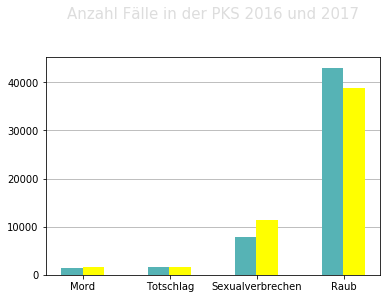

In [12]:
# Entwicklung einzelner Straftatbestände 2017 im Vergleich zu 2016

data = [mord2016, totschlag2016, sex2016, raub2016], [mord2017, totschlag2017, sex2017, raub2017]
z = np.arange(len(data[1]))
plt.bar(z + 0.00, data[0], width = 0.25, zorder=3, color='#56b3b5')
plt.bar(z+ 0.25, data[1], width = 0.25, zorder=3, color='yellow')
ttl7 = plt.title('Anzahl Fälle in der PKS 2016 und 2017', color='#dddddd', size=15, weight=400)
ttl7.set_position([.5, 1.15])
plt.xticks(z +0.13, ['Mord', 'Totschlag', 'Sexualverbrechen', 'Raub'])
plt.grid(axis='y')
plt.show()

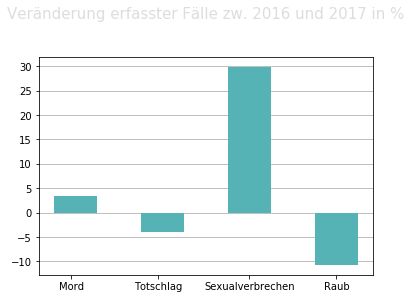

In [13]:
# Bar Chart mit prozentualen Veränderungen zum Vorjahr für bestimmte Straftaten

data = [mordDiff, totschlagDiff, sexDiff, raubDiff]
labels = ['Mord', 'Totschlag', 'Sexualverbrechen', 'Raub']

ind = np.arange(len(labels))
plt.bar(ind, data, zorder=3, color='#56b3b5', width=0.5, align='edge')

plt.xticks(ind, labels)
ttl8 = plt.title('Veränderung erfasster Fälle zw. 2016 und 2017 in %', color='#dddddd', size=15, weight=400)
ttl8.set_position([0.5,1.15])
plt.grid(axis='y')
plt.xticks([0.2, 1.2, 2.25, 3.25])
plt.show()

In [14]:
# Nichtdeutsche Tatverdächtige: An welchen Straftaten haben sie den höchsten Anteil aller Tatverdächtigen?

## Liste mit Schlüsseln aller ausländerrechtlichen Verstöße
unwanted = [725000,725100,725110,725120,725200,725210,725220,725300,725310,725311,725312,725320,725321,725322,725400,725410,725420,
725500,725510,725520,725600,725700,725710,725711,725712,725720,725800,725900]

## Liste mit Index IDs aller ausländerrechtlichen Verstöße
unwanted_IDs = [904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931]

## DataFrame um Reihen mit ausländerrechtlichen Verstößen bereinigen
df2017_ohneAusl = df2017.drop(df2017.index[unwanted_IDs])
df2017_ohneAusl = df2017_ohneAusl.drop(df2017_ohneAusl.index[0])
df2017_ohneAusl = df2017_ohneAusl.drop(df2017_ohneAusl.index[0])

## Neue DataFrames mit den Verstößen mit den höchsten Anteilen nichtdeutscher Tatverdächtiger
df2017_ohneAusl_larger50 = df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,19].astype(float)) >= 50] # größer 50%
df2017_ohneAusl_larger60 = df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,19].astype(float)) >= 60] # größer 60%
df2017_ohneAusl_larger40 = df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,19].astype(float)) >= 40] # größer 40%

## Straftaten, bei denen der Anteil an nichtdeutschen TV kleiner 15% ist
df2017_ohneAusl_smaller15 = df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,19].astype(float)) <= 15]

In [15]:
## Hoher Anteil an nichtdeutschen Tatverdächtigen unter anderem hierbei:

#111300 Vergewaltigung durch Gruppen
#111100 Vergewaltigung überfallartig (Einzeltäter)
#114000 Sexuelle Belästigung 184i StGB
#*90*00 Taschendiebstahl insgesamt
#210020 Räuberischer Diebstahl
#435*00 Wohnungseinbruchdiebstahl
#20010  Totschlag $ 212 StGB


## Wo es eher Sinn macht, dass Ausländer hohen Anteil an TV haben:

#676800 Abfallein-/-aus und -durchfuhr
#720014 Luftsicherheitsgesetz
#140010 Ausübung der verbotenen Prostitution
#715010 Markengesetz

## Arrays vorbereiten zum Visualisieren der Verstöße mit größten und kleinsten Anteilen nichtdeutscher Tatverdächtiger

hoechsteAnteileAusl = np.array([
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '111300'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '111100'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '114000'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '*90*00'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '210020'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '435*00'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '20010'].iloc[0,19]),
])

hoechsteAnteileAusl_absolut = np.array([
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '111300'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '111100'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '114000'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '*90*00'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '210020'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '435*00'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '20010'].iloc[0,2].replace(",","")),
])

hoechsteAnteileAusl_typisch = np.array([
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '676800'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '720014'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '140010'].iloc[0,19]),
float(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '715010'].iloc[0,19])
])

hoechsteAnteileAusl_typisch_absolut = np.array([
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '676800'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '720014'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '140010'].iloc[0,2].replace(",","")),
int(df2017_ohneAusl.loc[(df2017_ohneAusl.iloc[:,0]) == '715010'].iloc[0,2].replace(",",""))
])

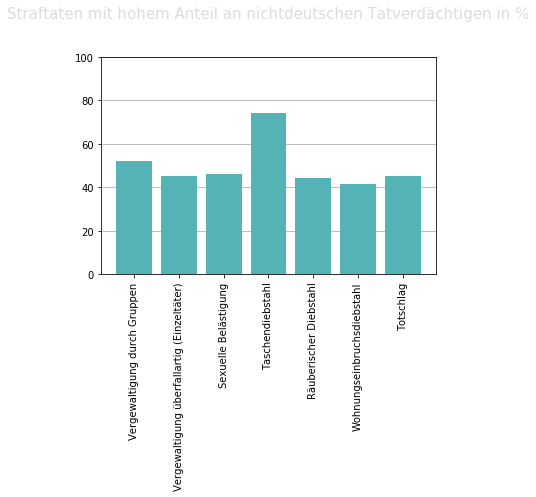

In [16]:
# Bar Chart mit Straftaten, die einen hohen Anteil an nichtdeutschen Tatverdächtigen haben

y_axis2 = hoechsteAnteileAusl
x_axis2 = ['Vergewaltigung durch Gruppen', 'Vergewaltigung überfallartig (Einzeltäter)', 'Sexuelle Belästigung', 'Taschendiebstahl', 'Räuberischer Diebstahl', 'Wohnungseinbruchsdiebstahl', 'Totschlag']

ttl9 = plt.title('Straftaten mit hohem Anteil an nichtdeutschen Tatverdächtigen in %', color='#dddddd', size=15, weight=400)
ttl9.set_position([0.5,1.15])
ind = np.arange(len(x_axis2))
plt.ylim(ymin=0, ymax=100)
plt.xticks(ind, x_axis2, rotation='vertical')
plt.grid(axis='y')
plt.bar(ind, y_axis2, zorder=3, color='#56b3b5')
plt.show()

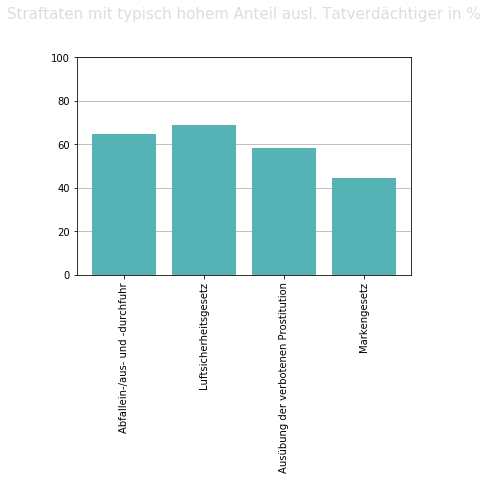

In [17]:
# Bar Chart mit Straftaten mit hohem Ausländeranteil, bei denen dieser möglicherweise Sinn macht

y_axis3 = hoechsteAnteileAusl_typisch
x_axis3 = ['Abfallein-/aus- und -durchfuhr', 'Luftsicherheitsgesetz', 'Ausübung der verbotenen Prostitution', 'Markengesetz']

ttl10 = plt.title('Straftaten mit typisch hohem Anteil ausl. Tatverdächtiger in %', color='#dddddd', size=15, weight=400)
ttl10.set_position([0.5, 1.15])
ind = np.arange(len(x_axis3))
plt.ylim(ymin=0, ymax=100)
plt.xticks(ind, x_axis3, rotation='vertical')
plt.grid(axis='y')
plt.bar(ind, y_axis3, zorder=3, color='#56b3b5')
plt.show()

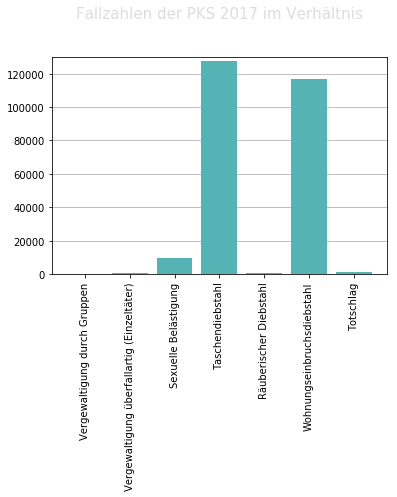

In [18]:
# Bar Chart mit absoluten Fallzahlen der Straftaten, an denen Ausländer am häufigsten beteiligt sind

y_axis4 = hoechsteAnteileAusl_absolut
x_axis4 = ['Vergewaltigung durch Gruppen', 'Vergewaltigung überfallartig (Einzeltäter)', 'Sexuelle Belästigung', 'Taschendiebstahl', 'Räuberischer Diebstahl', 'Wohnungseinbruchsdiebstahl', 'Totschlag']

ind = np.arange(len(x_axis4))
plt.ylim(ymin=0, ymax=130000)
plt.xticks(ind, x_axis4, rotation='vertical')
plt.bar(ind, y_axis4, zorder=3, color='#56b3b5')
plt.grid(axis='y')
ttl11 = plt.title('Fallzahlen der PKS 2017 im Verhältnis', color='#dddddd', size=15, weight=400)
ttl11.set_position([0.5, 1.15])
plt.show()